<a href="https://colab.research.google.com/github/young-hwanlee/stand_alone_deep_learning/blob/main/%2315_How_to_Write_Well_Organized_DL_Code_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer to : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [ ]:
# !pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)

1.12.0+cu113


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
# to make the image files into the PyTorch tensor
transform = transforms.Compose(
    [transforms.ToTensor(),                                                   # RGB : [0~255] -> [0~1]
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   # RGB : [0~1] -> [-0.5~0.5], and then divide by std = 0.5
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
# -----------------------------------------------------------------------------------------------------------------------------------
trainset, valset = torch.utils.data.random_split(trainset, [40000, 10000])
# -----------------------------------------------------------------------------------------------------------------------------------
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
# -----------------------------------------------------------------------------------------------------------------------------------
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False)
# -----------------------------------------------------------------------------------------------------------------------------------
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import numpy as np
print(np.min(testset.data), np.max(testset.data))

0 255


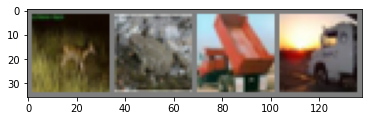

 deer  frog truck truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
print(type(images))
print(images.shape)     # [batch_size = 4, no. of channel (RGB) = 3, image size = 32 X 32]

print(labels)                  # classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(type(labels))
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([4, 3, 32, 32])
tensor([4, 6, 9, 9])
<class 'torch.Tensor'>
torch.Size([4])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# -----------------------------------------------------------------------------------------------------------------------------------
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hid_dim, n_layer, act):
        super(MLP, self).__init__()
        
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.hid_dim = hid_dim
        self.n_layer = n_layer
        self.act = act

        self.fc = nn.Linear(self.in_dim, self.hid_dim)
        self.linears = nn.ModuleList()
        
        for i in range(self.n_layer - 1):
            self.linears.append(nn.Linear(self.hid_dim, self.hid_dim))
        self.fc2 = nn.Linear(self.hid_dim, self.out_dim)

        if self.act == 'relu':
            self.act = nn.ReLU()

    def forward(self, x):
        x = self.act(self.fc(x))
        for fc in self.linears:
            x = self.act(fc(x))
        x = self.fc2(x)

        return x
# -----------------------------------------------------------------------------------------------------------------------------------

In [ ]:
net = MLP(in_dim=3072, out_dim=10, hid_dim=100, n_layer=4, act='relu')
print(net)

MLP(
  (fc): Linear(in_features=3072, out_features=100, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): Linear(in_features=100, out_features=100, bias=True)
    (2): Linear(in_features=100, out_features=100, bias=True)
  )
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (act): ReLU()
)


In [ ]:
# import torch.optim as optim

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# print(criterion)
# print(optimizer)

In [ ]:
# # ===== Train ===== #

# for epoch in range(2):  # loop over the dataset multiple times

#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data
#         # ----------------------------------------------------------------------------------------------------------------------------
#         inputs = inputs.view(-1, 3072)
#         # ----------------------------------------------------------------------------------------------------------------------------

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         if i % 2000 == 1999:    # print every 2000 mini-batches
#             print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
#             running_loss = 0.0

# print('Finished Training')

In [ ]:
# dataiter = iter(testloader)
# images, labels = dataiter.next()

# # print images
# imshow(torchvision.utils.make_grid(images))
# print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
# # -----------------------------------------------------------------------------------------------------------------------------------
# # ===== Validation ===== #

# correct = 0
# total = 0
# val_loss = 0

# # since we're not training, we don't need to calculate the gradients for our outputs
# with torch.no_grad():
#     for data in valloader:
#         images, labels = data
#         images = images.view(-1, 3072)

#         # calculate outputs by running images through the network
#         outputs = net(images)
#         loss = criterion(outputs, labels)
#         val_loss += loss.item()

#         # the class with the highest energy is what we choose as prediction
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     val_loss = val_loss / len(valloader)
#     # print(f'Validation loss: {val_loss}')
#     # print('Validation loss: {}'.format(val_loss))

# # print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# acc = 100 * correct // total
# print('Accuracy of the network on the 10000 test images: {:2.2f} %'.format(acc))
# print('Validation loss: {:2.2f}'.format(val_loss))
# # -----------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# # ===== Test ===== #

# correct = 0
# total = 0

# # since we're not training, we don't need to calculate the gradients for our outputs
# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         # ----------------------------------------------------------------------------------------------------------------------------
#         images = images.view(-1, 3072)
#         # ----------------------------------------------------------------------------------------------------------------------------

#         # calculate outputs by running images through the network
#         outputs = net(images)

#         # the class with the highest energy is what we choose as prediction
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [ ]:
# -----------------------------------------------------------------------------------------------------------------------------------
# ===== Experiment ===== #

def experiment(args):
    net = MLP(args.in_dim, args.out_dim, args.hid_dim, args.n_layer, args.act)
    net.cuda()
    print(net)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=args.lr, momentum=args.momentum)

    # ===== Train ===== #
    for epoch in range(args.epoch):      # loop over the dataset multiple times
        train_loss = 0.0
        running_loss = 0.0

        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            inputs = inputs.view(-1, 3072)
            inputs = inputs.cuda()
            labels = labels.cuda()

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            train_loss += loss.item()
            
            running_loss += loss.item()
            if i % 2000 == 1999:        # print every 2000 mini-batches
                print('[{}, {:5d}] Loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
        
        # ===== Validation ===== #
        correct = 0
        total = 0
        val_loss = 0
        with torch.no_grad():
            for data in valloader:
                images, labels = data
                images = images.view(-1, 3072)
                images = images.cuda()
                labels = labels.cuda()

                outputs = net(images)

                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            val_loss = val_loss / len(valloader)
            val_acc = 100 * correct / total

        print('Epoch: {}, Train Loss: {:2.2f}, Validation Loss: {:2.2f}, Validation Accuracy: {:2.2f}'.format(epoch, train_loss, val_loss, val_acc))

    # ===== Test ===== #
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.view(-1, 3072)
            images = images.cuda()
            labels = labels.cuda()

            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size()
            correct += (predicted == labels).sum().item()
        
        test_acc = 100 * correct / total
# -----------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# -----------------------------------------------------------------------------------------------------------------------------------
import argparse

seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

parser = argparse.ArgumentParser()
args = parser.parse_args("")
print(args)

args.n_layer = 5
args.in_dim = 3072
args.out_dim = 10
args.hid_dim = 100
args.act = 'relu'

args.lr = 0.001
args.momentum = 0.9

args.epoch = 2

list_var1 = [4, 5, 6]
list_var2 = [50, 100, 150]

for var1 in list_var1:
    for var2 in list_var2:
        args.n_layer = var1
        args.hid_dim = var2
        result = experiment(args)
        print(result)
# -----------------------------------------------------------------------------------------------------------------------------------

Namespace()


RuntimeError: ignored